# GRADUATE ROTATIONAL INTERNSHIP PROGRAM
   ### The Sparks Foundation

## Unsupervised Machine Learning
Unsupervised machine learning is a type of machine learning that looks for previously undetected patterns in a dataset with no preexisting labels and with a minimum of human supervision. In contrast to supervised learning that usually makes use of human-labelled data, unsupervised learning, also known as self organisation allows for modelling of probability densities over inputs

### Author: PRATHIMA C N

### Problem Statment
From the given ‘Iris’ dataset, predict the optimum number of clusters and
represent it visually.

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
# Importinf libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [2]:
# Reading data from remote link

df = pd.read_csv("Iris.csv",index_col="Id")
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Reading dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [4]:
# Stastical data information
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# Reading the shape of the dat frame
df.shape

(150, 5)

In [6]:
#Missing value
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
cs=df.copy()

In [8]:
#checking the duplicate entry
df.loc[df.duplicated()]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
35,4.9,3.1,1.5,0.1,Iris-setosa
38,4.9,3.1,1.5,0.1,Iris-setosa
143,5.8,2.7,5.1,1.9,Iris-virginica


 EDA

OUTLIER

In [9]:

fig=px.box(x=df["SepalLengthCm"],title="Iris data set")
fig.show()

In [10]:
fig=px.box(x=df["SepalWidthCm"])
fig.show()

In [11]:
fig=px.box(x=df["PetalLengthCm"])
fig.show()

In [12]:
fig=px.box(x=df["PetalWidthCm"])
fig.show()

No outliers in SepalLengthCm,PetalWidthCm,PetalLengthCm.

Outlier is present in Sepal width its not good idea to treat with outlier.

In [13]:
#Visualizing the Species
fig=px.bar(x="Species",title="Species v/s value_count" ,data_frame=df)
fig.show()

All Species are equally distributed

In [14]:
fig=px.bar(x="Species",y="SepalLengthCm",title="Species v/s SepalLengthCm" ,data_frame=df)
fig.show()

* The maximum Sepal Length is 5Cm with respect to Iris-Setosa
* The maximum Sepal Lenagth is 5.7cm with respect to Iris-Vericolor
* The maximum Sepal length is 5.9cm with respect to Iris -Virginica

In [15]:
fig=px.bar(x="Species",y="SepalWidthCm",title="Species v/s SepalWidthCm" ,data_frame=df)
fig.show()

* The maximum SepalWidth is 3.3Cm with respect to Iris-Setosa
* The maximum SepalWidth is 2.8cm with respect to Iris-Vericolor
* The maximum SepalWidthis 3cm with respect to Iris -Virginica

In [16]:
fig=px.bar(x="Species",y="PetalLengthCm",title="Species v/s PetalLengthCm" ,data_frame=df)
fig.show()

* The maximum PetalLength is 1.4Cm with respect to Iris-Setosa
* The maximum PetalLength is 4.1cm with respect to Iris-Vericolor
* The maximum PetalLength is 5.1cm with respect to Iris -Virginica

In [17]:
fig=px.bar(x="Species",y="PetalWidthCm",title="Species v/s PetalWidthCm" ,data_frame=df)
fig.show()

* The maximum PetalLength is 0.2Cm with respect to Iris-Setosa
* The maximum PetalLength is 1.1cm with respect to Iris-Vericolor
* The maximum PetalLength is 1.8cm with respect to Iris -Virginica

In [18]:
# Visualising the SepalLenagth v/s Sepal width with respect to species
fig = px.scatter(df, x="SepalLengthCm", y="SepalWidthCm", color="Species")
fig.show()

In [19]:
# Visualising the PetalLenagth v/s Petalwidth with respect to species
fig = px.scatter(df, x="PetalLengthCm", y="PetalWidthCm", color="Species")
fig.show()

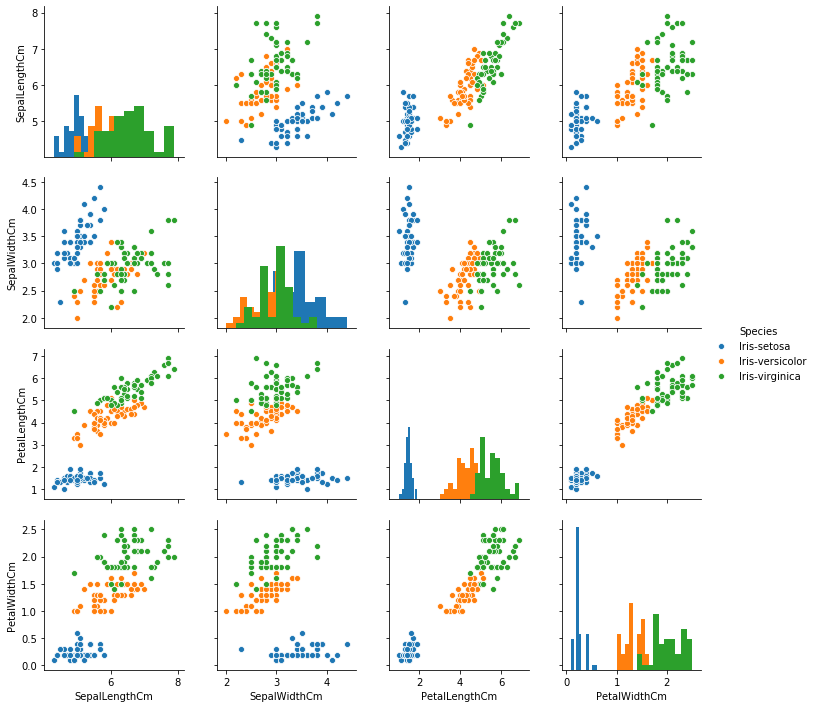

In [20]:
# fig=px.pairplot(data=df)
fig=sns.pairplot(data=df,hue="Species", diag_kind="hist")

In [21]:
fig = px.scatter_matrix(df,
    dimensions=["PetalWidthCm", "PetalLengthCm", "SepalWidthCm", "SepalLengthCm"],
    color="Species")
fig.show()

## k-Means Clustering

## Hopkins Statistics
Hopkins Statistics help us to decide whether the cluters can be formed easily or not. If the values are: 0.01 - 0.3 : Low chase of clustering around 0.5 : Random 0.7 - 0.99 : High chance of clustering

In [22]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [23]:
#Calling the function hopkins() and passing our dataset as argument
hopkins(df.drop(columns='Species'))

0.848502000795282

After running more than 10 times average hopkins score got it as more than 80%. Its good score so we can go on for clustering

In [24]:
df.drop(["Species"],axis=1,inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


In [25]:
# scaling excpet country column
from sklearn.preprocessing import StandardScaler

#instantiating the StandardScaler() class
standard_scaler = StandardScaler()
cs_scaled = standard_scaler.fit_transform(df)


### Silhouette Analysis
Value of the silhouette score range is in between -1 to 1.

A score closer to 1 : The data point is very similar to other data points in the cluster.

A score closer to -1 : The data point is not similar to the data points in its cluster.

In [26]:
#Importing the required libraries to perform silhouette score analysis
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#range_n_clusters contain the different values of k we need to test
range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9,10]

for num_clusters in range_n_clusters:

    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(cs_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5653839587789066
For n_clusters=3, the silhouette score is 0.44240103164555117
For n_clusters=4, the silhouette score is 0.3645209125131706
For n_clusters=5, the silhouette score is 0.35758404996678034
For n_clusters=6, the silhouette score is 0.29760804395679524
For n_clusters=7, the silhouette score is 0.30585926486271137
For n_clusters=8, the silhouette score is 0.2944845170626908
For n_clusters=9, the silhouette score is 0.2932174571187346
For n_clusters=10, the silhouette score is 0.23912891455558868


In [27]:
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(cs_scaled)
    ssd.append(model_clus.inertia_)

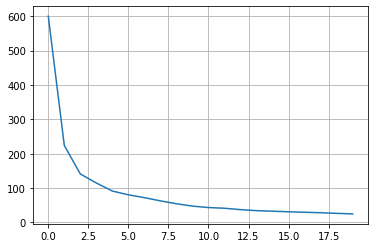

In [28]:
plt.plot(ssd)
plt.grid()
plt.show()

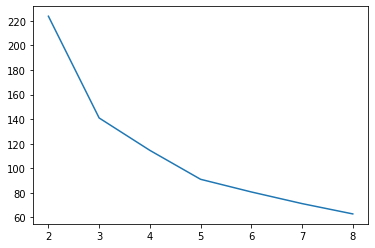

In [29]:
#Elbow Curve

#We will store the kmeans.inertia_ values for all different k in a list called ssd
ssd = []

#range_n_clusters contain the different values of k we need to test
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(cs_scaled)
    ssd.append(kmeans.inertia_) #appending the kmeans.inertia for k=num_clusters in ssd
    
# plot the SSDs for each n_clusters
plt.plot(list(range(2,9)), ssd)

From silhouette score and elboe curve, we can finalize the value of k=3

In [30]:
#Creating an instance of Kmeans and fitting the data into it.
kmeans = KMeans(n_clusters=3, random_state=50)
kmeans.fit(cs_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [31]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [32]:
# creating dataframe label
label=pd.DataFrame(kmeans.labels_,columns=['labels'])

In [33]:
# copying the cs dataframe
cs_kmeans=df.copy()

In [34]:
# concat the cs_kmeans and label
cs_kmeans=pd.concat([cs_kmeans,label],axis=1)

In [35]:
# counting the values of cs_kmeans
cs_kmeans.labels.value_counts()

2.0    53
0.0    50
1.0    47
Name: labels, dtype: int64

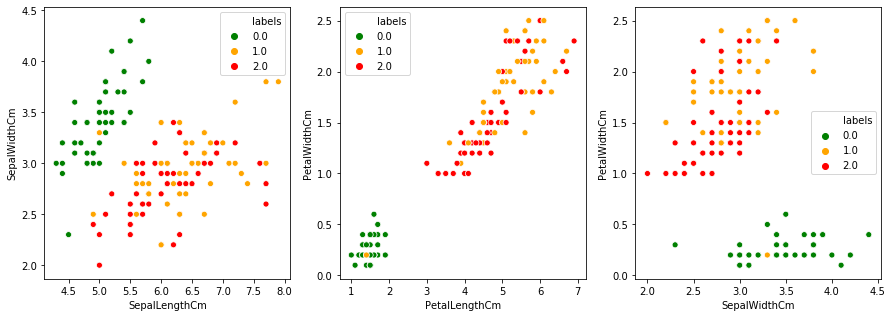

In [36]:
# ploting the scatter plot og gdpp,child_mort and income
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.scatterplot(x="SepalLengthCm",y="SepalWidthCm",hue="labels",data=cs_kmeans,palette=['green','orange','red'])
plt.subplot(1,3,2)
sns.scatterplot(x="PetalLengthCm",y="PetalWidthCm",hue="labels",data=cs_kmeans,palette=['green','orange','red'])
plt.subplot(1,3,3)
sns.scatterplot(x="SepalWidthCm",y="PetalWidthCm",hue="labels",data=cs_kmeans,palette=['green','orange','red'])

plt.show()

In [37]:
#profile clustering
cs_kmeans.groupby("labels").mean()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
labels,,,,
0.0,5.006122,3.420408,1.465306,0.244898
1.0,6.402128,2.972340,5.136170,1.814894
2.0,6.120755,2.788679,4.632075,1.522642


In [44]:
cs_kmean=pd.concat([cs_kmeans,cs["Species"]],join="outer",axis=1)
cs_kmean.tail()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,labels,Species
146,6.7,3.0,5.2,2.3,2.0,Iris-virginica
147,6.3,2.5,5.0,1.9,1.0,Iris-virginica
148,6.5,3.0,5.2,2.0,1.0,Iris-virginica
149,6.2,3.4,5.4,2.3,2.0,Iris-virginica
150,5.9,3.0,5.1,1.8,NaN,Iris-virginica


In [39]:
cs_kmean[cs_kmean["labels"]==0].tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,labels,Species
45,5.1,3.8,1.9,0.4,0.0,Iris-setosa
46,4.8,3.0,1.4,0.3,0.0,Iris-setosa
47,5.1,3.8,1.6,0.2,0.0,Iris-setosa
48,4.6,3.2,1.4,0.2,0.0,Iris-setosa
49,5.3,3.7,1.5,0.2,0.0,Iris-setosa


In [40]:
cs_kmean[cs_kmean["labels"]==1].head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,labels,Species
50,5.0,3.3,1.4,0.2,1.0,Iris-setosa
51,7.0,3.2,4.7,1.4,1.0,Iris-versicolor
52,6.4,3.2,4.5,1.5,1.0,Iris-versicolor
56,5.7,2.8,4.5,1.3,1.0,Iris-versicolor
65,5.6,2.9,3.6,1.3,1.0,Iris-versicolor


In [43]:
cs_kmean[cs_kmean["labels"]==2].head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,labels,Species
53,6.9,3.1,4.9,1.5,2.0,Iris-versicolor
54,5.5,2.3,4.0,1.3,2.0,Iris-versicolor
55,6.5,2.8,4.6,1.5,2.0,Iris-versicolor
57,6.3,3.3,4.7,1.6,2.0,Iris-versicolor
58,4.9,2.4,3.3,1.0,2.0,Iris-versicolor


### Conclusion:
K-Means has clustered the data into three different clusters perfectly. This concludes the task of predicting the optimum number of clusters and represent it visually.